#Camila Lima Ferreira de Souza - Ra: 2100218
#Daniela Alexandra da Silva- Ra: 2100282
#Julia Camila Matias de Araújo - Ra: 2100236
#Guilherme Silva Monteiro - Ra: 2100299

Entendimento dos Dados

-Qual o formato dos dados? ✅ CSV - 
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
              #Column                                       #Dtype  
---  ------ --------------  -----  
 0   INDICE                                                 int64  
 1   UTC - CARIMBO DE DATA E HORA - SEGUNDOS                int64  
 2   TEMPERATURA DO AR [C]                                  float64
 3   UMIDADE DO AR [%]                                      float64
 4   TVOC[ppb] TOTAL DE COMPOSTOS ORGANICOS                 int64  
 5   eCO2[ppm] CONCENTRAÇÃO EQUIVALENTE DE CO2              int64  
 6   H2 HIDROGENIO MOLECULAR BRUTO                          int64  
 7   GAS ETANOL BRUTO                                       int64  
 8   [hPa] PRESÃO DO AR                                     float64
 9   PM1.0 TAMANHO DO MATERIAL PARTICULADO                  float64
 10  PM2.5 TAMANHO DO MATERIAL PARTICULADO                  float64
 11  NC0.5 CONCENTRAÇÃO NÚMERICA DE MATERIAL PARTICULADO    float64
 12  NC1.0 CONCENTRAÇÃO NÚMERICA DE MATERIAL PARTICULADO    object 
 13  NC2.5 CONCENTRAÇÃO NÚMERICA DE MATERIAL PARTICULADO    object 
 14  CNT CONTADOR DE AMOSTRA                                int64  
 15  ALARME DE INCENDIO                                     int64  
dtypes: float64(6), int64(8), object(2)

– Quantos registros existem? ✅ 

  São 62630 linhas e 16 colunas.


– Qual campo é um candidato a alvo?  
  ALARME DE INCENDIO

– Quantos vazios existem em cada atributo? 
  Não existem vazios.

– Qual a distribuição de (DETECÇÃO FUMAÇA:) ?

#Sem risco de incendio 0 = 17873      
#Com risco de incendio 1 = 44757

In [1]:
#Importando as bibliotecas para uso
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Over sampling and under sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
dataset = pd.read_csv('/content/smoke_detection_iot.csv', sep=';') 
dataset

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,INDICE,UTC - CARIMBO DE DATA E HORA - SEGUNDOS,TEMPERATURA DO AR [C],UMIDADE DO AR [%],TVOC[ppb] TOTAL DE COMPOSTOS ORGANICOS,eCO2[ppm] CONCENTRAÇÃO EQUIVALENTE DE CO2,H2 HIDROGENIO MOLECULAR BRUTO,GAS ETANOL BRUTO,[hPa] PRESÃO DO AR,PM1.0 TAMANHO DO MATERIAL PARTICULADO,PM2.5 TAMANHO DO MATERIAL PARTICULADO,NC0.5 CONCENTRAÇÃO NÚMERICA DE MATERIAL PARTICULADO,NC1.0 CONCENTRAÇÃO NÚMERICA DE MATERIAL PARTICULADO,NC2.5 CONCENTRAÇÃO NÚMERICA DE MATERIAL PARTICULADO,CNT CONTADOR DE AMOSTRA,ALARME DE INCENDIO
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.0,0.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [2]:
#Informações de todo a base de dados
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   INDICE                                               62630 non-null  int64  
 1   UTC - CARIMBO DE DATA E HORA - SEGUNDOS              62630 non-null  int64  
 2   TEMPERATURA DO AR [C]                                62630 non-null  float64
 3   UMIDADE DO AR [%]                                    62630 non-null  float64
 4   TVOC[ppb] TOTAL DE COMPOSTOS ORGANICOS               62630 non-null  int64  
 5   eCO2[ppm] CONCENTRAÇÃO EQUIVALENTE DE CO2            62630 non-null  int64  
 6   H2 HIDROGENIO MOLECULAR BRUTO                        62630 non-null  int64  
 7   GAS ETANOL BRUTO                                     62630 non-null  int64  
 8   [hPa] PRESÃO DO AR                                   62630 non-nul

In [3]:
# Trazendo as soma de valores NaN
print(dataset.isna().sum())

INDICE                                                 0
UTC - CARIMBO DE DATA E HORA - SEGUNDOS                0
TEMPERATURA DO AR [C]                                  0
UMIDADE DO AR [%]                                      0
TVOC[ppb] TOTAL DE COMPOSTOS ORGANICOS                 0
eCO2[ppm] CONCENTRAÇÃO EQUIVALENTE DE CO2              0
H2 HIDROGENIO MOLECULAR BRUTO                          0
GAS ETANOL BRUTO                                       0
[hPa] PRESÃO DO AR                                     0
PM1.0 TAMANHO DO MATERIAL PARTICULADO                  0
PM2.5 TAMANHO DO MATERIAL PARTICULADO                  0
NC0.5 CONCENTRAÇÃO NÚMERICA DE MATERIAL PARTICULADO    0
NC1.0 CONCENTRAÇÃO NÚMERICA DE MATERIAL PARTICULADO    0
NC2.5 CONCENTRAÇÃO NÚMERICA DE MATERIAL PARTICULADO    0
CNT CONTADOR DE AMOSTRA                                0
ALARME DE INCENDIO                                     0
dtype: int64


In [4]:
 #converte os valores nulos ou 'nan' para 0
 dataset = dataset.fillna(0)


In [5]:
#Agrupando a coluna ALVO e fazendo contagem de positivos e negativos
dataset['ALARME DE INCENDIO'].groupby(by=dataset['ALARME DE INCENDIO']).count()

ALARME DE INCENDIO
0    17873
1    44757
Name: ALARME DE INCENDIO, dtype: int64

In [6]:
# Adicionando a coluna "Alarme de Incendio" como NOVA coluna " ALVO"
dataset['ALVO'] = dataset['ALARME DE INCENDIO']

In [7]:
# REMOVENDO COLUNAS QUE NÂO SERÃO UTILIZADAS 
dataset.drop(columns=['INDICE'],inplace= True)
dataset.drop(columns=['ALARME DE INCENDIO'],inplace= True)
dataset = dataset.drop('CNT CONTADOR DE AMOSTRA ', axis=1)
dataset = dataset.drop('UTC - CARIMBO DE DATA E HORA - SEGUNDOS', axis=1)

In [8]:
#convertendo coluna objects para numerico
dataset['NC1.0 CONCENTRAÇÃO NÚMERICA DE MATERIAL PARTICULADO'] = pd.to_numeric(dataset['NC1.0 CONCENTRAÇÃO NÚMERICA DE MATERIAL PARTICULADO'], errors = 'coerce')
dataset['NC2.5 CONCENTRAÇÃO NÚMERICA DE MATERIAL PARTICULADO'] = pd.to_numeric(dataset['NC2.5 CONCENTRAÇÃO NÚMERICA DE MATERIAL PARTICULADO'], errors= 'coerce')

In [9]:
# Fazendo tratamento da coluna Umidade do Ar para nova coluna " UMIDADE_TR" minimo: 12:00  Max: 65.00
dataset['UMIDADE_TR']  = [12.00 if np.isnan(x) or x <=12.00 else x  for x in dataset['UMIDADE DO AR [%]']]
dataset['UMIDADE_TR']  = [65.00 if x >65.00 else x  for x in dataset['UMIDADE_TR']]
dataset['UMIDADE_TR']  = [(x-12.00)/(65.00-12.00) for x in dataset['UMIDADE_TR']]

##SEPARANDO O TRATAMENTO DA COLUNA TEMPERATURA

In [10]:
#Utilizando o describe que traz as pricipais medidas como media, quartils, minimo e etc da coluna.
dataset['TEMPERATURA DO AR [C]'].describe()

count    62630.000000
mean        15.970424
std         14.359576
min        -22.010000
25%         10.994250
50%         20.130000
75%         25.409500
max         59.930000
Name: TEMPERATURA DO AR [C], dtype: float64

In [11]:
#Calculo para o primeiro e terceiro quartil
Q3 = dataset['TEMPERATURA DO AR [C]'].describe()[6] #pegamos a sexta posição do describe, que equivale ao Q3
Q1 = dataset['TEMPERATURA DO AR [C]'].describe()[4]#pegamos a quarta posição do describe, que equivale ao Q1
IQR = Q3 - Q1 #Calculamos Q3 - Q1 para termos o intervalo
media = dataset['TEMPERATURA DO AR [C]'].describe()[1] #pegamos a primeira posição do describe, que equivale a media
media

15.97042358294747

In [12]:
# Verificando os valores e trazendo os index
max = dataset['TEMPERATURA DO AR [C]']>= ( media + 1.5 * IQR )
min = dataset['TEMPERATURA DO AR [C]'] <= ( media - 1.5 * IQR )

print('Valores (Index) que são Outliers')
print( np.where(min) )
print( np.where(max) )

Valores (Index) que são Outliers
(array([ 4552,  4553,  4554, ..., 62480, 62481, 62482]),)
(array([50354, 50355, 50356, ..., 56883, 56884, 56885]),)


In [13]:
#Atribuindo uma nova variavel o Min e o Max como limites (Inferior e Superior)
Men = media - 1.5 * IQR
Mai = media + 1.5 * IQR

Men, Mai

(-5.652451417052534, 37.593298582947476)

In [14]:
# Fazendo tratamento da coluna Temperatura do Ar para nova coluna " TEMPERATURA_TR" minimo: (-5.65)   Max: 37.60
dataset['TEMPERATURA_TR']  = [(-5.65) if np.isnan(x) or x <=(-5.65) else x  for x in dataset['TEMPERATURA DO AR [C]']]
dataset['TEMPERATURA_TR']  = [37.60  if x >37.60 else x  for x in dataset['TEMPERATURA_TR']]
dataset['TEMPERATURA_TR']  = [(x-(-5.65))/(37.60-(-5.65)) for x in dataset['TEMPERATURA_TR']]

##SEPARANDO O TRATAMENTO DA COLUNA TOTAL DE COMPOSTOS ORGANICOS

In [15]:
#Utilizando o describe que traz as pricipais medidas como media, quartils, minimo e etc da coluna.
dataset['TVOC[ppb] TOTAL DE COMPOSTOS ORGANICOS '].describe()

count    62630.000000
mean      1942.057528
std       7811.589055
min          0.000000
25%        130.000000
50%        981.000000
75%       1189.000000
max      60000.000000
Name: TVOC[ppb] TOTAL DE COMPOSTOS ORGANICOS , dtype: float64

In [16]:
#Calculo para o primeiro e terceiro quartil
Q3 = dataset['TVOC[ppb] TOTAL DE COMPOSTOS ORGANICOS '].describe()[6] #pegamos a sexta posição do describe, que equivale ao Q3
Q1 = dataset['TVOC[ppb] TOTAL DE COMPOSTOS ORGANICOS '].describe()[4]#pegamos a quarta posição do describe, que equivale ao Q1
IQR = Q3 - Q1 #Calculamos Q3 - Q1 para termos o intervalo
media = dataset['TVOC[ppb] TOTAL DE COMPOSTOS ORGANICOS '].describe()[1] #pegamos a primeira posição do describe, que equivale a media
media

1942.0575283410506

In [17]:
# Verificando os valores e trazendo os index
Superior = dataset['TVOC[ppb] TOTAL DE COMPOSTOS ORGANICOS '] >= ( media + 1.5 * IQR )
Inferior = dataset['TVOC[ppb] TOTAL DE COMPOSTOS ORGANICOS '] <= ( media - 1.5 * IQR )

print('Valores (Index) que são Outliers')
print(np.where(Inferior))
print(np.where(Superior))

Valores (Index) que são Outliers
(array([    0,     1,     2, ..., 61685, 61686, 61687]),)
(array([50210, 50211, 50212, ..., 62339, 62340, 62341]),)


In [18]:
#Atribuindo uma nova variavel o Min e o Max como limites (Inferior e Superior)
Menor = media - 1.5 * IQR
Maior = media + 1.5 * IQR

Menor, Maior

(353.55752834105056, 3530.557528341051)

In [19]:
dataset['TOTAL DE COMPOSTOS ORGANICOS_TR']  = [353.55 if np.isnan(x) or x <=353.55 else x  for x in dataset['TVOC[ppb] TOTAL DE COMPOSTOS ORGANICOS ']]
dataset['TOTAL DE COMPOSTOS ORGANICOS_TR']  = [3530.55 if x >=3530.55 else x  for x in dataset['TOTAL DE COMPOSTOS ORGANICOS_TR']]
dataset['TOTAL DE COMPOSTOS ORGANICOS_TR']  = [(x-353.55)/(3530.55-353.55) for x in dataset['TOTAL DE COMPOSTOS ORGANICOS_TR']]

##SEPARANDO O TRATAMENTO DA COLUNA CONCENTRAÇÃO DE GAS CARBONO (CO²)

In [20]:
#Utilizando o describe que traz as pricipais medidas como media, quartils, minimo e etc da coluna.
dataset['eCO2[ppm] CONCENTRAÇÃO EQUIVALENTE DE CO2'].describe()

count    62630.000000
mean       670.021044
std       1905.885439
min        400.000000
25%        400.000000
50%        400.000000
75%        438.000000
max      60000.000000
Name: eCO2[ppm] CONCENTRAÇÃO EQUIVALENTE DE CO2, dtype: float64

In [21]:
#Calculo para o primeiro e terceiro quartil
Q3 = dataset['eCO2[ppm] CONCENTRAÇÃO EQUIVALENTE DE CO2'].describe()[6] #pegamos a sexta posição do describe, que equivale ao Q3
Q1 = dataset['eCO2[ppm] CONCENTRAÇÃO EQUIVALENTE DE CO2'].describe()[4]#pegamos a quarta posição do describe, que equivale ao Q1
IQR2 = Q3 - Q1 #Calculamos Q3 - Q1 para termos o intervalo
media = dataset['eCO2[ppm] CONCENTRAÇÃO EQUIVALENTE DE CO2'].describe()[1] #pegamos a primeira posição do describe, que equivale a media
media

670.0210442280057

In [22]:
# Verificando os valores e trazendo os index
Superior2 = dataset['eCO2[ppm] CONCENTRAÇÃO EQUIVALENTE DE CO2'] >= ( Q3 + 1.5 * IQR )
Inferior2 = dataset['eCO2[ppm] CONCENTRAÇÃO EQUIVALENTE DE CO2'] <= ( Q1 - 1.5 * IQR )

print('Valores (Index) que são Outliers')
print( np.where(Inferior2) )
print( np.where(Superior2) )

Valores (Index) que são Outliers
(array([], dtype=int64),)
(array([49997, 49998, 49999, ..., 62155, 62156, 62157]),)


In [23]:
#Atribuindo uma nova variavel o Min e o Max como limites (Inferior e Superior)
Menor2 = media - 1.5 * IQR2
Maior2 = media + 1.5 * IQR2

Menor2, Maior2

(613.0210442280057, 727.0210442280057)

In [24]:
dataset['CO2_TR']  = [613 if np.isnan(x) or x <=613 else x  for x in dataset['eCO2[ppm] CONCENTRAÇÃO EQUIVALENTE DE CO2']]
dataset['CO2_TR']  = [727 if x >=727 else x  for x in dataset['CO2_TR']]
dataset['CO2_TR']  = [(x-613)/(727-613) for x in dataset['CO2_TR']]

##SEPARANDO O TRATAMENTO DA COLUNA HIDROGENIO

In [25]:
dataset['HIDROGENIO_TR']  = [10700.00 if np.isnan(x) or x <=10700.00 else x  for x in dataset['H2 HIDROGENIO MOLECULAR BRUTO']]
dataset['HIDROGENIO_TR']  = [13000.00 if x >13000.00 else x  for x in dataset['HIDROGENIO_TR']]
dataset['HIDROGENIO_TR']  = [(x-10700.00)/(13000.00-10700.00) for x in dataset['HIDROGENIO_TR']]

##SEPARANDO O TRATAMENTO DA COLUNA ETANOL

In [26]:
dataset['ETANOL_TR']  = [19400.00 if np.isnan(x) or x <=19400.00 else x  for x in dataset['GAS ETANOL BRUTO']]
dataset['ETANOL_TR']  = [20300.00 if x >=20300.00 else x  for x in dataset['ETANOL_TR']]
dataset['ETANOL_TR']  = [(x-19400.00)/(20300.00-19400.00) for x in dataset['ETANOL_TR']]

##SEPARANDO O TRATAMENTO DA COLUNA PRESSÃO DO AR

In [27]:
dataset['PRESSAO_DO_AR_TR']  = [(x-930.850)/(939.860-930.850) for x in dataset['[hPa] PRESÃO DO AR']]

##SEPARANDO O TRATAMENTO DA COLUNA PM1.0 - TAMANHO DE MATERIAL PARTICULADO

In [28]:
dataset['PM1.0_TR']  = [0 if np.isnan(x) or x <=0 else x for x in dataset['PM1.0 TAMANHO DO MATERIAL PARTICULADO']]
dataset['PM1.0_TR']  = [100.00 if x >=100.00 else x  for x in dataset['PM1.0_TR']]
dataset['PM1.0_TR']  = [(x-0)/(100.00-0) for x in dataset['PM1.0_TR']]

##SEPARANDO O TRATAMENTO DA COLUNA PM2.5 - TAMANHO DE MATERIAL PARTICULADO

In [29]:
dataset['PM2.5_TR']  = [0 if np.isnan(x) or x <=0 else x for x in dataset['PM2.5 TAMANHO DO MATERIAL PARTICULADO']]
dataset['PM2.5_TR']  = [100.00 if x >=100.00 else x for x in dataset['PM2.5_TR']]
dataset['PM2.5_TR']  = [(x-0)/(100.00-0) for x in dataset['PM2.5_TR']]

##SEPARANDO O TRATAMENTO DA COLUNA NC0.5 - CONCENTRAÇÃO NUMERICA MATERIAL PARTICULADO

In [30]:
dataset['NC0.5_TR']  = [0 if np.isnan(x) or x <=0 else x for x in dataset['NC0.5 CONCENTRAÇÃO NÚMERICA DE MATERIAL PARTICULADO']]
dataset['NC0.5_TR']  = [100.00 if x >=100.00 else x  for x in dataset['NC0.5_TR']]
dataset['NC0.5_TR']  = [(x-0)/(100.00-0) for x in dataset['NC0.5_TR']]

##SEPARANDO O TRATAMENTO DA COLUNA NC1.0 - CONCENTRAÇÃO NUMERICA MATERIAL PARTICULADO

In [31]:
dataset['NC1.0_TR']  = [0 if np.isnan(x) or x <=0 else x for x in dataset['NC1.0 CONCENTRAÇÃO NÚMERICA DE MATERIAL PARTICULADO']]
dataset['NC1.0_TR']  = [1000.00 if x >=1000.00 else x  for x in dataset['NC1.0_TR']]
dataset['NC1.0_TR']  = [(x-0)/(1000.00-0) for x in dataset['NC1.0_TR']]

##SEPARANDO O TRATAMENTO DA COLUNA NC2.5 - CONCENTRAÇÃO NUMERICA MATERIAL PARTICULADO

In [32]:
dataset['NC2.5_TR']  = [0 if np.isnan(x) or x <=0 else x for x in dataset['NC2.5 CONCENTRAÇÃO NÚMERICA DE MATERIAL PARTICULADO']]
dataset['NC2.5_TR']  = [1000.00 if x >=1000.00 else x  for x in dataset['NC2.5_TR']]
dataset['NC2.5_TR']  = [(x-0)/(1000.00-0) for x in dataset['NC2.5_TR']]

In [33]:
#Utilizando o describe que traz as pricipais medidas como media, quartils, minimo e etc daS COLUNAS TRATADAS.
dataset.describe()

,TEMPERATURA DO AR [C],UMIDADE DO AR [%],TVOC[ppb] TOTAL DE COMPOSTOS ORGANICOS,eCO2[ppm] CONCENTRAÇÃO EQUIVALENTE DE CO2,H2 HIDROGENIO MOLECULAR BRUTO,GAS ETANOL BRUTO,[hPa] PRESÃO DO AR,PM1.0 TAMANHO DO MATERIAL PARTICULADO,PM2.5 TAMANHO DO MATERIAL PARTICULADO,NC0.5 CONCENTRAÇÃO NÚMERICA DE MATERIAL PARTICULADO,...,TOTAL DE COMPOSTOS ORGANICOS_TR,CO2_TR,HIDROGENIO_TR,ETANOL_TR,PRESSAO_DO_AR_TR,PM1.0_TR,PM2.5_TR,NC0.5_TR,NC1.0_TR,NC2.5_TR
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,...,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,...,0.172199,0.075817,0.948668,0.384954,0.863224,0.036093,0.036836,0.131615,0.005173,0.002612
std,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,...,0.212639,0.244057,0.094444,0.391634,0.147763,0.136209,0.136535,0.141202,0.051231,0.041139
min,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000222,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,...,0.000000,0.000000,0.926087,0.038889,0.871254,0.012800,0.013400,0.088200,0.001206,0.000031
50%,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,...,0.197498,0.000000,0.966957,0.112222,0.884129,0.018100,0.018800,0.124500,0.001927,0.000044
75%,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,...,0.262968,0.000000,1.000000,0.753333,0.950943,0.020900,0.021800,0.144200,0.002230,0.000051
max,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,...,1.000000,1.000000,1.000000,1.000000,1.000111,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
#PEGANDO AS COLUNAS
dataset.columns

Index(['TEMPERATURA DO AR [C]', 'UMIDADE DO AR [%]',
       'TVOC[ppb] TOTAL DE COMPOSTOS ORGANICOS ',
       'eCO2[ppm] CONCENTRAÇÃO EQUIVALENTE DE CO2',
       'H2 HIDROGENIO MOLECULAR BRUTO', 'GAS ETANOL BRUTO',
       '[hPa] PRESÃO DO AR', 'PM1.0 TAMANHO DO MATERIAL PARTICULADO',
       'PM2.5 TAMANHO DO MATERIAL PARTICULADO',
       'NC0.5 CONCENTRAÇÃO NÚMERICA DE MATERIAL PARTICULADO',
       'NC1.0 CONCENTRAÇÃO NÚMERICA DE MATERIAL PARTICULADO',
       'NC2.5 CONCENTRAÇÃO NÚMERICA DE MATERIAL PARTICULADO', 'ALVO',
       'UMIDADE_TR', 'TEMPERATURA_TR', 'TOTAL DE COMPOSTOS ORGANICOS_TR',
       'CO2_TR', 'HIDROGENIO_TR', 'ETANOL_TR', 'PRESSAO_DO_AR_TR', 'PM1.0_TR',
       'PM2.5_TR', 'NC0.5_TR', 'NC1.0_TR', 'NC2.5_TR'],
      dtype='object')

In [35]:
#PEGANDO AS COLUNAS TRATADAS
colunas_in = ['ALVO',
          'CONJUNTO',
        'UMIDADE_TR',
    'TEMPERATURA_TR',
 'TOTAL DE COMPOSTOS ORGANICOS_TR',
         'CO2_TR', 
  'HIDROGENIO_TR', 
      'ETANOL_TR', 
 'PRESSAO_DO_AR_TR', 
         'PM1.0_TR',
         'PM2.5_TR',
         'NC0.5_TR', 
         'NC1.0_TR', 
         'NC2.5_TR']

In [36]:
colunas_in

['ALVO',
 'CONJUNTO',
 'UMIDADE_TR',
 'TEMPERATURA_TR',
 'TOTAL DE COMPOSTOS ORGANICOS_TR',
 'CO2_TR',
 'HIDROGENIO_TR',
 'ETANOL_TR',
 'PRESSAO_DO_AR_TR',
 'PM1.0_TR',
 'PM2.5_TR',
 'NC0.5_TR',
 'NC1.0_TR',
 'NC2.5_TR']

In [37]:
#separar treino e teste
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.30, random_state=88)
train.insert(0, "CONJUNTO","TREINO")#criar coluna de treinamento
test.insert(0, "CONJUNTO","TESTE")#criar coluna de teste
dataset = pd.concat([test,train])
dataset.to_csv('pre_processamento.csv', sep='\t') #Exporta para CSV

In [38]:
#separando conjuntos
x_train = dataset.query("CONJUNTO =='TREINO'")
x_test = dataset.query("CONJUNTO =='TESTE'")
x_train = x_train[colunas_in]
x_test = x_test[colunas_in]

In [39]:
#REFAZER  E RETIRAR OS ALVOS
y_train = x_train['ALVO']
y_test =  x_test['ALVO']

#excluindo o alvo do x pois não usamos
del x_train['ALVO']
del x_test['ALVO']

del x_train['CONJUNTO']
del x_test['CONJUNTO']

In [40]:
#selecionar as colunas/atributos principais "fazer"
#---------------------------------------------------------------------------
## Selecionando Atributos com RFE - Recursive Feature Elimination
#---------------------------------------------------------------------------
# feature extraction
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression()
selected = RFE(model,step=1,n_features_to_select=12).fit(x_train, y_train)

print('--------------------------------------------------')
print('---  SELEÇÃO DE VARIÁVEIS  ---')
print('--------------------------------------------------')
print("Quantidade de Variáveis: %d" % selected.n_features_)
used_cols = []
for i in range(0, len(selected.support_)):
    if selected.support_[i]: 
        used_cols.append(x_train.columns[i]) 
        print('             -> {:30}     '.format(x_train.columns[i]))
print('--------------------------------------------------')

x_train = x_train[used_cols]     # Carrega colunas de entrada selecionadas por RFE
x_test = x_test[used_cols]       # Carrega colunas de entrada selecionadas por RFE


--------------------------------------------------
---  SELEÇÃO DE VARIÁVEIS  ---
--------------------------------------------------
Quantidade de Variáveis: 12
             -> UMIDADE_TR                         
             -> TEMPERATURA_TR                     
             -> TOTAL DE COMPOSTOS ORGANICOS_TR     
             -> CO2_TR                             
             -> HIDROGENIO_TR                      
             -> ETANOL_TR                          
             -> PRESSAO_DO_AR_TR                   
             -> PM1.0_TR                           
             -> PM2.5_TR                           
             -> NC0.5_TR                           
             -> NC1.0_TR                           
             -> NC2.5_TR                           
--------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [41]:
# Randomly over sample the minority class
ros = RandomOverSampler(random_state=42)
x_train_ros, y_train_ros= ros.fit_resample(x_train, y_train)

# Check the number of records after over sampling
print(sorted(Counter(y_train_ros).items()))

[(0, 31387), (1, 31387)]


In [42]:
#Passando no dataset 
dataset = (x_train_ros),(y_train_ros)

In [43]:
#AJUSTAR MODELOS (TREINAMENTO) - AP.SUPERVISIONADO
##REGRESSÃO LOGISTICA
from sklearn.linear_model import LogisticRegression
LogisticReg = LogisticRegression()
LogisticReg.fit(x_train_ros,y_train_ros)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [44]:
## RNA
from sklearn.neural_network import MLPClassifier
RNA = MLPClassifier(hidden_layer_sizes=(20), max_iter=2000, validation_fraction=0.2)
RNA.fit(x_train_ros, y_train_ros)

MLPClassifier(hidden_layer_sizes=20, max_iter=2000, validation_fraction=0.2)

In [45]:
#PREDIÇÃO REGRESSAO LOGISTICA
y_pred_train_RL = LogisticReg.predict(x_train_ros)
y_pred_test_RL = LogisticReg.predict(x_test)

###################################################################
## PREDIÇÃO
###################################################################
# Regressão Logística  
y_pred_train_RL = LogisticReg.predict(x_train_ros)
y_pred_test_RL = LogisticReg.predict(x_test)

#PREDIÇÃO PROBALIDADE
y_pred_train_RL_P = LogisticReg.predict_proba(x_train_ros)
y_pred_test_RL_P = LogisticReg.predict_proba(x_test)

# RNA
y_pred_train_RNA = RNA.predict(x_train_ros)
y_pred_test_RNA = RNA.predict(x_test)

#PREDIÇÃO PROBALIDADE
y_pred_train_RNA_P = RNA.predict_proba(x_train_ros)
y_pred_test_RNA_P = RNA.predict_proba(x_test)

In [46]:
#REPORT QUE TRAZ AS PRINCIPAIS METRICAS DO MODELO
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test_RL))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      5419
           1       0.97      0.91      0.94     13370

    accuracy                           0.91     18789
   macro avg       0.89      0.92      0.90     18789
weighted avg       0.92      0.91      0.92     18789



In [47]:
## Montando um Data Frame (Matriz) com os resultados
# Conjunto de treinamento
df_train = pd.DataFrame(y_pred_train_RL, columns=['CLASSIF_RL'])
df_train['CLASSIF_RNA'] = y_pred_train_RNA
df_train['REGRESSION_RL'] = [x for x in y_pred_train_RL_P[:,1]] 
df_train['REGRESSION_RNA'] = [x for x in y_pred_train_RNA_P[:,1]]
df_train['TARGET'] = [x for x in y_train_ros]
df_train['TRN_TST'] = 'TRAIN'
# Conjunto de test
df_test = pd.DataFrame(y_pred_test_RL, columns=['CLASSIF_RL'])
df_test['CLASSIF_RNA'] = y_pred_test_RNA
df_test['REGRESSION_RL'] = [x for x in y_pred_test_RL_P[:,1]]  
df_test['REGRESSION_RNA'] = [x for x in y_pred_test_RNA_P[:,1]]
df_test['TARGET'] = [x for x in y_test]
df_test['TRN_TST'] = 'TEST' 
# Juntando Conjunto de Teste e Treinamento
df_total = pd.concat([df_test, df_train])

## Exportando os dados para avaliação dos resultados
df_total.to_csv('saidas_modelos.csv')

In [48]:
###################################################################
## AVALIAÇÃO DE DESEMPENHO
###################################################################
from sklearn import metrics
Acc_RNA_Classificacao = metrics.accuracy_score(y_test, y_pred_test_RNA)
Acc_RL_Classificacao  = metrics.accuracy_score(y_test, y_pred_test_RL)
print()
print('----------------------------------------')
print('RNA Acurácia              :',np.round(Acc_RNA_Classificacao,4))
print('RNA Erro de Classificação :',np.round(1 - Acc_RNA_Classificacao,4))
print('RNA Erro Médio Quadrático :',np.round(np.mean((y_test - y_pred_test_RNA_P[:,1]) **2),4))
print()
print('RLog Acurácia             :',np.round(Acc_RL_Classificacao,4))
print('RLog Erro de Classificação:',np.round(1 - Acc_RL_Classificacao,4))
print('RLog Erro Médio Quadrático:',np.round(np.mean((y_test - y_pred_test_RL_P[:,1]) **2),4))
print('----------------------------------------')
print()
print()



----------------------------------------
RNA Acurácia              : 0.9749
RNA Erro de Classificação : 0.0251
RNA Erro Médio Quadrático : 0.0194

RLog Acurácia             : 0.9149
RLog Erro de Classificação: 0.0851
RLog Erro Médio Quadrático: 0.0607
----------------------------------------




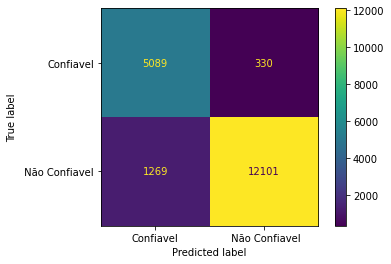

In [49]:
#MATRIZ DE CONFUSÃO PARA REGRESSÃO LOGISTICA
from sklearn.metrics import confusion_matrix #criando matriz de confusão
cm = confusion_matrix(y_test, y_pred_test_RL)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Confiavel', ' Não Confiavel']).plot();

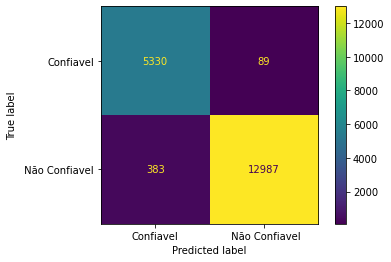

In [50]:
#MATRIZ DE CONFUSÃO PARA REDES NEURAIS
from sklearn.metrics import confusion_matrix #criando matriz de confusão
cm = confusion_matrix(y_test, y_pred_test_RNA)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Confiavel', ' Não Confiavel']).plot();

#CONCLUSÃO 

###APÓS FAZER A PREPARAÇÃO DOS DADOS: REMOVENDO VALORES NULOS E 'NAN', FAZENDO TRATAMENTO DE OUTILEIRS E ELIMINANDO COLUNAS QUE NÃO SERÃO UTILIZADAS PARA ESSE CONTEXTO, FIZEMOS A SEPARAÇÃO DO CONJUNTO TREINO E TESTE PARA O MODELO DE REGRESSÃO LOGISTICA E REDES NEURAIS.

##DEPOIS AVALIAMOS ATRAVÉS DA MÉTRICA ACURÁCIA A EFICÁCIA DE ACERTIVIDADE DO CONJUNTO COM Acurácia: 0.97 E  0.02 DE ERRO (RNA) considerando o melhor modelo. CONCLUI SE QUE O MODELO CHEGA A BATER O OBJETIVO DA META QUE ERA 85% DE ACURACIA.